In [1]:
save_name = 'ResNet34_Oversample_L2_Sum_PosWeight_12_Targets_20_Epochs'

In [2]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks\ModelRuns
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [3]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [4]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [5]:
out_channels=12
net_kwargs = {'layers':34, 'drop_out_precent':.5, 'out_channels':out_channels} #18, 34, 50, 101, 152
net = ResNet_GrayScale(**net_kwargs) 

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

          Linear-125                 [-1, 1000]         513,000
          ResNet-126                 [-1, 1000]               0
          Linear-127                   [-1, 12]          12,012
ResNet_GrayScale-128                   [-1, 12]               0
Total params: 21,803,412
Trainable params: 21,803,412
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.39
Forward/backward pass size (MB): 196.51
Params size (MB): 83.17
Estimated Total Size (MB): 280.08
----------------------------------------------------------------


In [6]:
standardTraining = StandardTraining(number_images=25000, 
                                     batch_size=64, 
                                     learning_rate=1e-5, 
                                     num_epochs=20,
                                     device=device, 
                                     net=net,
                                     use_positivity_weights=True,
                                     observation_min_count=150,
                                     loss_reduction='sum',
                                     l2_reg=1e-1,
                                     augPercent=.4,
                                     save_path= f'notebooks/ModelRuns/saved/{save_name}/',
                                     net_name = 'ResNet_GrayScale',
                                     net_kwargs = net_kwargs)

Total Oversampled Rows Added to Train: 25,452

Number of Training Images: 45,533
Number of Validation Images: 4,919

Positive Weights used in BCEWithLogitsLoss:


Enlarged_Cardiomediastinum     6.774116
Cardiomegaly                   4.291458
Lung_Opacity                   1.113685
Lung_Lesion                    7.138159
Edema                          2.759330
Consolidation                  5.180671
Pneumonia                      9.708608
Atelectasis                    3.234052
Pneumothorax                   6.072538
Pleural_Effusion               1.548013
Pleural_Other                 18.584086
Fracture                       6.707007
dtype: float64

In [7]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 544989.3057         
Time of Completion: 2020-08-03 11:44:55.571061          
Training Duration: 0:08:08.426996          
Validation Duration: 0:00:27.823398

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,20172,0.579779,0.247323,0.346735,0.629428,0.303540
4,Edema,12112,20372,0.622936,0.370361,0.464536,0.670721,0.400457
5,Consolidation,7367,19143,0.599294,0.230633,0.333082,0.659053,0.323549
7,Atelectasis,10754,21461,0.524735,0.262942,0.350334,0.552843,0.275162
9,Pleural_Effusion,17870,22299,0.568998,0.455985,0.506261,0.594377,0.478002



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,101,0.034483,0.198020,0.058737,0.632215,0.168356
4,Edema,1146,969,0.336824,0.398349,0.365012,0.702695,0.377778
5,Consolidation,297,552,0.148148,0.079710,0.103651,0.556484,0.076464
7,Atelectasis,772,2207,0.490933,0.171726,0.254448,0.556847,0.172983
9,Pleural_Effusion,1704,807,0.262324,0.553903,0.356033,0.679067,0.510897


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 423714.2725         
Time of Completion: 2020-08-03 11:53:27.721936          
Training Duration: 0:08:04.514863          
Validation Duration: 0:00:27.238105

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,15629,0.702382,0.386717,0.498803,0.806250,0.583757
4,Edema,12112,19054,0.757843,0.481736,0.589039,0.809065,0.608919
5,Consolidation,7367,13347,0.706258,0.389825,0.502366,0.834486,0.649091
7,Atelectasis,10754,19767,0.595313,0.323873,0.419514,0.660250,0.410131
9,Pleural_Effusion,17870,21566,0.637437,0.528193,0.577696,0.688898,0.575858



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,771,0.265517,0.199741,0.227979,0.652295,0.182383
4,Edema,1146,2126,0.683246,0.368297,0.478606,0.727547,0.421440
5,Consolidation,297,1947,0.478114,0.072933,0.126560,0.572318,0.078046
7,Atelectasis,772,3460,0.743523,0.165896,0.271267,0.531827,0.166090
9,Pleural_Effusion,1704,2355,0.679577,0.491720,0.570584,0.708668,0.534489


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [3/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 368481.9035         
Time of Completion: 2020-08-03 12:01:59.248332          
Training Duration: 0:08:03.918260          
Validation Duration: 0:00:27.235135

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,13772,0.767577,0.479596,0.590338,0.875819,0.718729
4,Edema,12112,17851,0.794006,0.538737,0.641925,0.858584,0.705812
5,Consolidation,7367,11699,0.753495,0.474485,0.582293,0.885115,0.741382
7,Atelectasis,10754,16755,0.646271,0.414802,0.505289,0.763492,0.597072
9,Pleural_Effusion,17870,21060,0.681365,0.578158,0.625533,0.749664,0.647022



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,1256,0.451724,0.208599,0.285403,0.676693,0.209322
4,Edema,1146,2053,0.694590,0.387725,0.497656,0.741653,0.449042
5,Consolidation,297,1314,0.336700,0.076104,0.124146,0.571128,0.078993
7,Atelectasis,772,1855,0.439119,0.182749,0.258089,0.545966,0.174832
9,Pleural_Effusion,1704,2433,0.703638,0.492807,0.579647,0.715155,0.542089


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [4/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 334333.6603         
Time of Completion: 2020-08-03 12:10:30.842915          
Training Duration: 0:08:03.951540          
Validation Duration: 0:00:27.281012

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,13018,0.788379,0.521125,0.627480,0.900264,0.768738
4,Edema,12112,17136,0.806721,0.570203,0.668148,0.879511,0.748527
5,Consolidation,7367,11403,0.790824,0.510918,0.620778,0.908160,0.784028
7,Atelectasis,10754,15591,0.680119,0.469117,0.555248,0.814063,0.677573
9,Pleural_Effusion,17870,20274,0.725406,0.639390,0.679687,0.811244,0.739447



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,877,0.367241,0.242873,0.292382,0.705455,0.231519
4,Edema,1146,2066,0.684119,0.379477,0.488169,0.742223,0.441248
5,Consolidation,297,832,0.228956,0.081731,0.120461,0.586352,0.079169
7,Atelectasis,772,1421,0.363990,0.197748,0.256270,0.565442,0.182389
9,Pleural_Effusion,1704,1832,0.586854,0.545852,0.565611,0.728839,0.561453


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [5/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 310819.5187         
Time of Completion: 2020-08-03 12:19:02.658276          
Training Duration: 0:08:04.202237          
Validation Duration: 0:00:27.249098

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,12734,0.813945,0.550024,0.656451,0.915759,0.795244
4,Edema,12112,16889,0.815059,0.584522,0.680804,0.890218,0.768564
5,Consolidation,7367,11109,0.814036,0.539833,0.649166,0.922810,0.809695
7,Atelectasis,10754,15504,0.713967,0.495227,0.584812,0.838615,0.709712
9,Pleural_Effusion,17870,19837,0.754169,0.679387,0.714827,0.848357,0.795414



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,402,0.213793,0.308458,0.252546,0.717642,0.243692
4,Edema,1146,1186,0.472077,0.456155,0.463979,0.749133,0.461262
5,Consolidation,297,487,0.161616,0.098563,0.122449,0.603907,0.084723
7,Atelectasis,772,1133,0.305699,0.208297,0.247769,0.564536,0.185664
9,Pleural_Effusion,1704,2030,0.634390,0.532512,0.579004,0.728124,0.565938


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [6/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 289778.0836         
Time of Completion: 2020-08-03 12:27:36.762421          
Training Duration: 0:08:06.379349          
Validation Duration: 0:00:27.365757

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,12323,0.828820,0.578755,0.681575,0.928280,0.819708
4,Edema,12112,16601,0.824637,0.601651,0.695713,0.901137,0.789613
5,Consolidation,7367,10903,0.830053,0.560855,0.669403,0.933014,0.828696
7,Atelectasis,10754,15368,0.736377,0.515292,0.606309,0.857037,0.737503
9,Pleural_Effusion,17870,19826,0.777336,0.700646,0.737001,0.867106,0.822706



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,1513,0.574138,0.220093,0.318204,0.712852,0.248600
4,Edema,1146,1918,0.675393,0.403545,0.505222,0.753060,0.466709
5,Consolidation,297,487,0.138047,0.084189,0.104592,0.582848,0.080403
7,Atelectasis,772,1562,0.379534,0.187580,0.251071,0.553054,0.179723
9,Pleural_Effusion,1704,2146,0.666667,0.529357,0.590130,0.735463,0.572657


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [7/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 273900.1756         
Time of Completion: 2020-08-03 12:36:13.534537          
Training Duration: 0:08:08.703229          
Validation Duration: 0:00:27.704861

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,12107,0.838234,0.595771,0.696504,0.934893,0.834762
4,Edema,12112,16454,0.835370,0.614926,0.708395,0.909527,0.806801
5,Consolidation,7367,10614,0.839962,0.583004,0.688282,0.940576,0.849320
7,Atelectasis,10754,14943,0.748373,0.538580,0.626377,0.872242,0.762344
9,Pleural_Effusion,17870,19610,0.792445,0.722132,0.755656,0.882096,0.841909



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,1162,0.489655,0.244406,0.326062,0.719826,0.263113
4,Edema,1146,1557,0.579407,0.426461,0.491306,0.755125,0.463464
5,Consolidation,297,2045,0.538721,0.078240,0.136635,0.587502,0.085805
7,Atelectasis,772,1307,0.322539,0.190513,0.239538,0.557498,0.182144
9,Pleural_Effusion,1704,2054,0.642606,0.533106,0.582757,0.737266,0.573155


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [8/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 260233.2806         
Time of Completion: 2020-08-03 12:44:48.758041          
Training Duration: 0:08:07.668194          
Validation Duration: 0:00:27.192282

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,12073,0.852179,0.607388,0.709256,0.941916,0.848715
4,Edema,12112,16208,0.844204,0.630861,0.722105,0.916116,0.817200
5,Consolidation,7367,10448,0.848514,0.598296,0.701768,0.945528,0.860407
7,Atelectasis,10754,14656,0.760647,0.558133,0.643841,0.881748,0.777573
9,Pleural_Effusion,17870,19580,0.800168,0.730286,0.763632,0.891821,0.856427



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,786,0.363793,0.268448,0.308931,0.719395,0.262528
4,Edema,1146,2021,0.707679,0.401286,0.512157,0.760320,0.471181
5,Consolidation,297,201,0.077441,0.114428,0.092369,0.574430,0.079426
7,Atelectasis,772,1211,0.321244,0.204789,0.250126,0.573290,0.192072
9,Pleural_Effusion,1704,2430,0.731221,0.512757,0.602806,0.741731,0.583494


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [9/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 248738.2887         
Time of Completion: 2020-08-03 12:53:49.237036          
Training Duration: 0:08:08.004471          
Validation Duration: 0:00:52.118509

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,11801,0.859384,0.626642,0.724787,0.946878,0.860439
4,Edema,12112,16100,0.844039,0.634969,0.724727,0.920068,0.827277
5,Consolidation,7367,10195,0.864124,0.624424,0.724974,0.953505,0.877051
7,Atelectasis,10754,14710,0.773108,0.565194,0.653000,0.889244,0.789687
9,Pleural_Effusion,17870,19472,0.813766,0.746816,0.778855,0.902764,0.870052



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,917,0.437931,0.276990,0.339345,0.730254,0.265288
4,Edema,1146,1980,0.689354,0.398990,0.505438,0.758668,0.462847
5,Consolidation,297,218,0.077441,0.105505,0.089320,0.572964,0.080024
7,Atelectasis,772,2408,0.563472,0.180648,0.273585,0.566006,0.190224
9,Pleural_Effusion,1704,2140,0.667840,0.531776,0.592092,0.744817,0.586738


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [10/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 236692.2757         
Time of Completion: 2020-08-03 13:29:41.316830          
Training Duration: 0:32:48.865269          
Validation Duration: 0:03:02.865482

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,11605,0.870308,0.645325,0.741118,0.953740,0.875131
4,Edema,12112,15987,0.849075,0.643273,0.731983,0.923581,0.833437
5,Consolidation,7367,9908,0.869282,0.646346,0.741418,0.956630,0.886492
7,Atelectasis,10754,14356,0.785847,0.588674,0.673118,0.899325,0.806723
9,Pleural_Effusion,17870,19451,0.818131,0.751632,0.783473,0.906598,0.876710



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,644,0.360345,0.324534,0.341503,0.736210,0.279370
4,Edema,1146,1536,0.578534,0.431641,0.494407,0.756764,0.465308
5,Consolidation,297,547,0.148148,0.080439,0.104265,0.591617,0.081139
7,Atelectasis,772,2708,0.626943,0.178730,0.278161,0.567531,0.195958
9,Pleural_Effusion,1704,1387,0.487089,0.598414,0.537043,0.741589,0.584620


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [11/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 226480.6039         
Time of Completion: 2020-08-03 14:07:41.285388          
Training Duration: 0:35:08.570979          
Validation Duration: 0:02:51.023609

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,11464,0.874375,0.656315,0.749813,0.956082,0.881699
4,Edema,12112,15847,0.857414,0.655329,0.742873,0.929847,0.847025
5,Consolidation,7367,9784,0.877291,0.660568,0.753659,0.962519,0.899163
7,Atelectasis,10754,14198,0.791054,0.599169,0.681869,0.905936,0.818197
9,Pleural_Effusion,17870,19373,0.826805,0.762659,0.793438,0.913750,0.885436



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,421,0.251724,0.346793,0.291708,0.745186,0.285752
4,Edema,1146,769,0.335079,0.499350,0.401044,0.761180,0.467905
5,Consolidation,297,428,0.127946,0.088785,0.104828,0.597433,0.083645
7,Atelectasis,772,1644,0.427461,0.200730,0.273179,0.567933,0.195043
9,Pleural_Effusion,1704,2044,0.667254,0.556262,0.606724,0.755181,0.603175


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [12/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 216463.5502         
Time of Completion: 2020-08-03 14:45:35.826739          
Training Duration: 0:35:03.612412          
Validation Duration: 0:02:50.570897

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,11289,0.878791,0.669856,0.760229,0.959789,0.890246
4,Edema,12112,15769,0.864762,0.664215,0.751336,0.933755,0.854793
5,Consolidation,7367,9609,0.885028,0.678531,0.768143,0.965681,0.907726
7,Atelectasis,10754,14091,0.804445,0.613938,0.696398,0.915445,0.832766
9,Pleural_Effusion,17870,19350,0.833016,0.769302,0.799893,0.919898,0.893408



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,1277,0.562069,0.255286,0.351104,0.745020,0.296896
4,Edema,1146,1830,0.661431,0.414208,0.509409,0.765063,0.477510
5,Consolidation,297,868,0.242424,0.082949,0.123605,0.588391,0.082964
7,Atelectasis,772,1618,0.405440,0.193449,0.261925,0.566393,0.195446
9,Pleural_Effusion,1704,2687,0.782277,0.496092,0.607151,0.753040,0.605165


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [13/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 209418.1407         
Time of Completion: 2020-08-03 15:23:30.418265          
Training Duration: 0:35:03.720493          
Validation Duration: 0:02:50.510996

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,11234,0.884137,0.677230,0.766974,0.962668,0.896596
4,Edema,12112,15635,0.864432,0.669651,0.754676,0.937205,0.862088
5,Consolidation,7367,9509,0.889643,0.689242,0.776724,0.968851,0.915765
7,Atelectasis,10754,13871,0.811977,0.629515,0.709198,0.921273,0.844089
9,Pleural_Effusion,17870,19238,0.833408,0.774145,0.802684,0.922148,0.896948



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,701,0.403448,0.333809,0.365340,0.761550,0.318537
4,Edema,1146,1209,0.486038,0.460711,0.473036,0.757303,0.464828
5,Consolidation,297,326,0.114478,0.104294,0.109149,0.593942,0.081682
7,Atelectasis,772,1923,0.471503,0.189288,0.270130,0.563228,0.193378
9,Pleural_Effusion,1704,2012,0.662559,0.561133,0.607643,0.756928,0.607687


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [14/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 201881.4848         
Time of Completion: 2020-08-03 16:01:25.480151          
Training Duration: 0:35:03.885729          
Validation Duration: 0:02:50.822104

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,11101,0.886810,0.687416,0.774485,0.965612,0.903781
4,Edema,12112,15466,0.868230,0.679943,0.762637,0.939460,0.865872
5,Consolidation,7367,9366,0.893444,0.702755,0.786709,0.971231,0.920960
7,Atelectasis,10754,13865,0.819881,0.635918,0.716276,0.925430,0.849884
9,Pleural_Effusion,17870,19129,0.838668,0.783470,0.810130,0.926210,0.902643



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,328,0.229310,0.405488,0.292952,0.746541,0.299145
4,Edema,1146,1691,0.636126,0.431106,0.513923,0.766002,0.478709
5,Consolidation,297,860,0.282828,0.097674,0.145203,0.612075,0.088474
7,Atelectasis,772,687,0.194301,0.218341,0.205620,0.562904,0.191017
9,Pleural_Effusion,1704,1258,0.462441,0.626391,0.532073,0.754627,0.607197


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [15/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 193810.7440         
Time of Completion: 2020-08-03 16:39:41.809372          
Training Duration: 0:35:24.546468          
Validation Duration: 0:02:51.425708

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,10955,0.894829,0.702875,0.787321,0.968476,0.911810
4,Edema,12112,15317,0.868147,0.686492,0.766707,0.943424,0.875738
5,Consolidation,7367,9309,0.901860,0.713718,0.796834,0.974077,0.927478
7,Atelectasis,10754,13753,0.826948,0.646623,0.725752,0.930403,0.858960
9,Pleural_Effusion,17870,19223,0.846558,0.786974,0.815680,0.930159,0.906827



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,487,0.312069,0.371663,0.339269,0.761507,0.313633
4,Edema,1146,1150,0.477312,0.475652,0.476481,0.759687,0.458544
5,Consolidation,297,454,0.134680,0.088106,0.106525,0.596628,0.082564
7,Atelectasis,772,1412,0.358808,0.196176,0.253663,0.581091,0.198043
9,Pleural_Effusion,1704,1817,0.607981,0.570171,0.588469,0.753682,0.611849


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [16/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 187570.7895         
Time of Completion: 2020-08-03 17:17:37.769367          
Training Duration: 0:35:04.083748          
Validation Duration: 0:02:51.524190

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,10834,0.902847,0.717094,0.799321,0.971847,0.920221
4,Edema,12112,15258,0.873431,0.693341,0.773036,0.945748,0.878771
5,Consolidation,7367,9131,0.904846,0.730041,0.808098,0.975456,0.931967
7,Atelectasis,10754,13608,0.830482,0.656305,0.733191,0.934441,0.866082
9,Pleural_Effusion,17870,19135,0.846279,0.790332,0.817349,0.933421,0.911437



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,1038,0.527586,0.294798,0.378245,0.769194,0.326733
4,Edema,1146,1714,0.647469,0.432905,0.518881,0.767658,0.479548
5,Consolidation,297,330,0.097643,0.087879,0.092504,0.602093,0.082760
7,Atelectasis,772,607,0.164508,0.209226,0.184191,0.579150,0.193063
9,Pleural_Effusion,1704,1949,0.647300,0.565931,0.603887,0.760428,0.619850


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [17/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 184431.2538         
Time of Completion: 2020-08-03 17:55:28.004326          
Training Duration: 0:34:59.876236          
Validation Duration: 0:02:50.008680

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,10826,0.899128,0.714668,0.796356,0.972192,0.920841
4,Edema,12112,15273,0.877972,0.696261,0.776630,0.946931,0.881679
5,Consolidation,7367,9133,0.910547,0.734479,0.813091,0.976854,0.936809
7,Atelectasis,10754,13515,0.834015,0.663633,0.739132,0.937293,0.872103
9,Pleural_Effusion,17870,19077,0.850867,0.797033,0.823071,0.936472,0.915755



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,740,0.413793,0.324324,0.363636,0.757213,0.308765
4,Edema,1146,1097,0.446771,0.466727,0.456531,0.761172,0.463013
5,Consolidation,297,337,0.114478,0.100890,0.107256,0.604774,0.086300
7,Atelectasis,772,900,0.230570,0.197778,0.212919,0.576399,0.195167
9,Pleural_Effusion,1704,1784,0.610915,0.583520,0.596904,0.757739,0.616357


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [18/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 176572.4567         
Time of Completion: 2020-08-03 18:33:24.822085          
Training Duration: 0:35:05.845179          
Validation Duration: 0:02:50.628501

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,10625,0.906915,0.734494,0.811648,0.974915,0.928165
4,Edema,12112,15189,0.881027,0.702548,0.781730,0.951119,0.890686
5,Consolidation,7367,9026,0.913805,0.745845,0.821326,0.978434,0.940258
7,Atelectasis,10754,13334,0.844709,0.681266,0.754234,0.943095,0.882255
9,Pleural_Effusion,17870,18960,0.853945,0.804852,0.828672,0.939995,0.920542



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,551,0.343103,0.361162,0.351901,0.764119,0.320745
4,Edema,1146,1934,0.687609,0.407446,0.511688,0.760729,0.473193
5,Consolidation,297,93,0.050505,0.161290,0.076923,0.598686,0.095161
7,Atelectasis,772,792,0.217617,0.212121,0.214834,0.569534,0.191710
9,Pleural_Effusion,1704,1328,0.492958,0.632530,0.554090,0.759958,0.619265


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [19/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 172570.6336         
Time of Completion: 2020-08-03 19:11:20.307644          
Training Duration: 0:35:04.824962          
Validation Duration: 0:02:50.315520

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,10643,0.912958,0.738138,0.816293,0.976555,0.931577
4,Edema,12112,15143,0.881522,0.705078,0.783489,0.951557,0.893166
5,Consolidation,7367,8943,0.914212,0.753103,0.825874,0.980469,0.943900
7,Atelectasis,10754,13270,0.837828,0.678975,0.750083,0.942613,0.882713
9,Pleural_Effusion,17870,19010,0.855792,0.804471,0.829338,0.941109,0.921312



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,395,0.272414,0.400000,0.324103,0.765898,0.326576
4,Edema,1146,1986,0.692845,0.399799,0.507024,0.757191,0.467156
5,Consolidation,297,407,0.124579,0.090909,0.105114,0.599296,0.089012
7,Atelectasis,772,1444,0.363990,0.194598,0.253610,0.567183,0.192600
9,Pleural_Effusion,1704,2448,0.738263,0.513889,0.605973,0.755912,0.618269


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [20/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 168618.6488         
Time of Completion: 2020-08-03 19:50:12.051350          
Training Duration: 0:35:55.660802          
Validation Duration: 0:02:55.734835

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8605,10575,0.915166,0.744681,0.821168,0.977287,0.934286
4,Edema,12112,15005,0.881027,0.711163,0.787034,0.953138,0.896425
5,Consolidation,7367,8809,0.919370,0.768873,0.837413,0.981663,0.948200
7,Atelectasis,10754,13321,0.849916,0.686135,0.759294,0.946634,0.888812
9,Pleural_Effusion,17870,19020,0.863626,0.811409,0.836704,0.944557,0.926087



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,580,605,0.370690,0.355372,0.362869,0.766631,0.325836
4,Edema,1146,1298,0.508726,0.449153,0.477087,0.756542,0.458977
5,Consolidation,297,869,0.269360,0.092060,0.137221,0.602442,0.086084
7,Atelectasis,772,924,0.248705,0.207792,0.226415,0.575308,0.195365
9,Pleural_Effusion,1704,2910,0.822770,0.481787,0.607716,0.756839,0.618659


Training Duration: 8:13:53.079727



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.526673
Hamming Loss,0.082643
Hamming Accuracy,0.917357
Combined Recall,0.768183
Combined Precision,0.697907
Combined F1,0.713543


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,5857,7366,0.922998,0.733913,0.817666,0.983428,0.946545
1,Cardiomegaly,8605,10575,0.915166,0.744681,0.821168,0.977287,0.934286
2,Lung_Opacity,21542,21932,0.805543,0.791218,0.798316,0.901722,0.899978
3,Lung_Lesion,5595,6987,0.927256,0.742522,0.824670,0.985741,0.949754
4,Edema,12112,15005,0.881027,0.711163,0.787034,0.953138,0.896425
5,Consolidation,7367,8809,0.919370,0.768873,0.837413,0.981663,0.948200
6,Pneumonia,4252,5535,0.943321,0.724661,0.819659,0.989571,0.953589
7,Atelectasis,10754,13321,0.849916,0.686135,0.759294,0.946634,0.888812
8,Pneumothorax,6438,8566,0.912395,0.685734,0.782991,0.978700,0.926639
9,Pleural_Effusion,17870,19020,0.863626,0.811409,0.836704,0.944557,0.926087


***** ROC *****


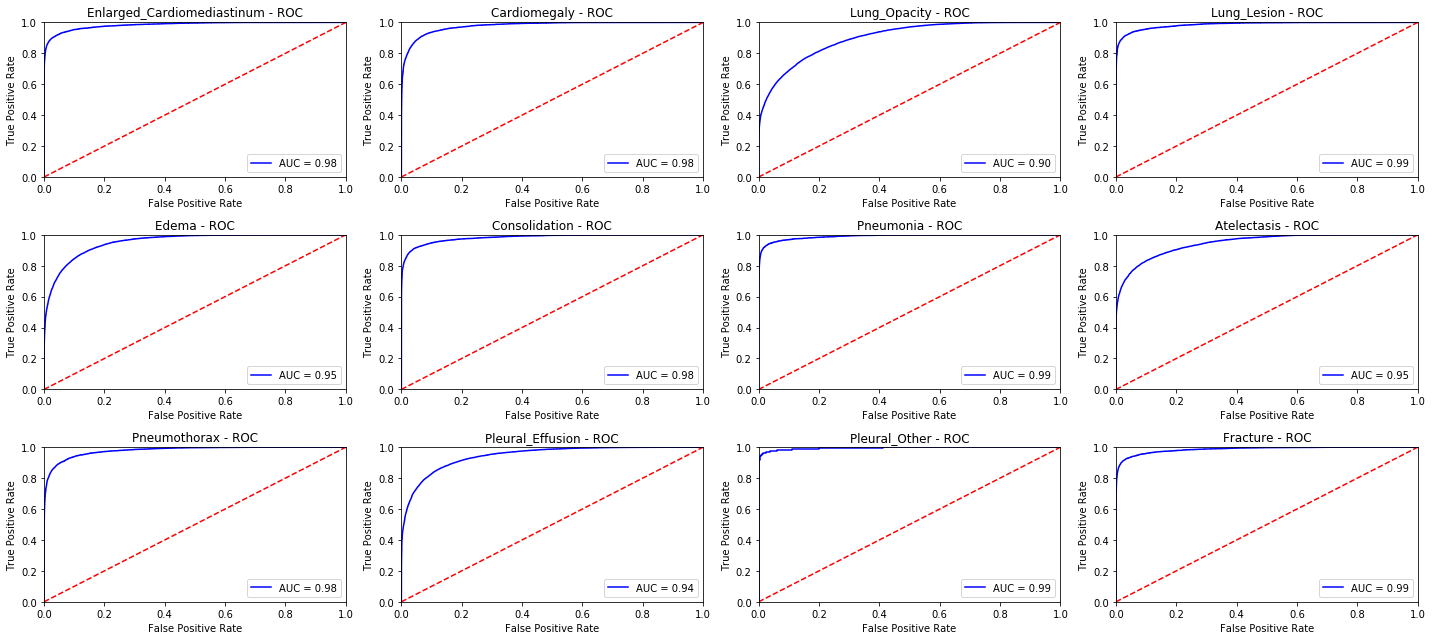

***** Precision / Recall *****


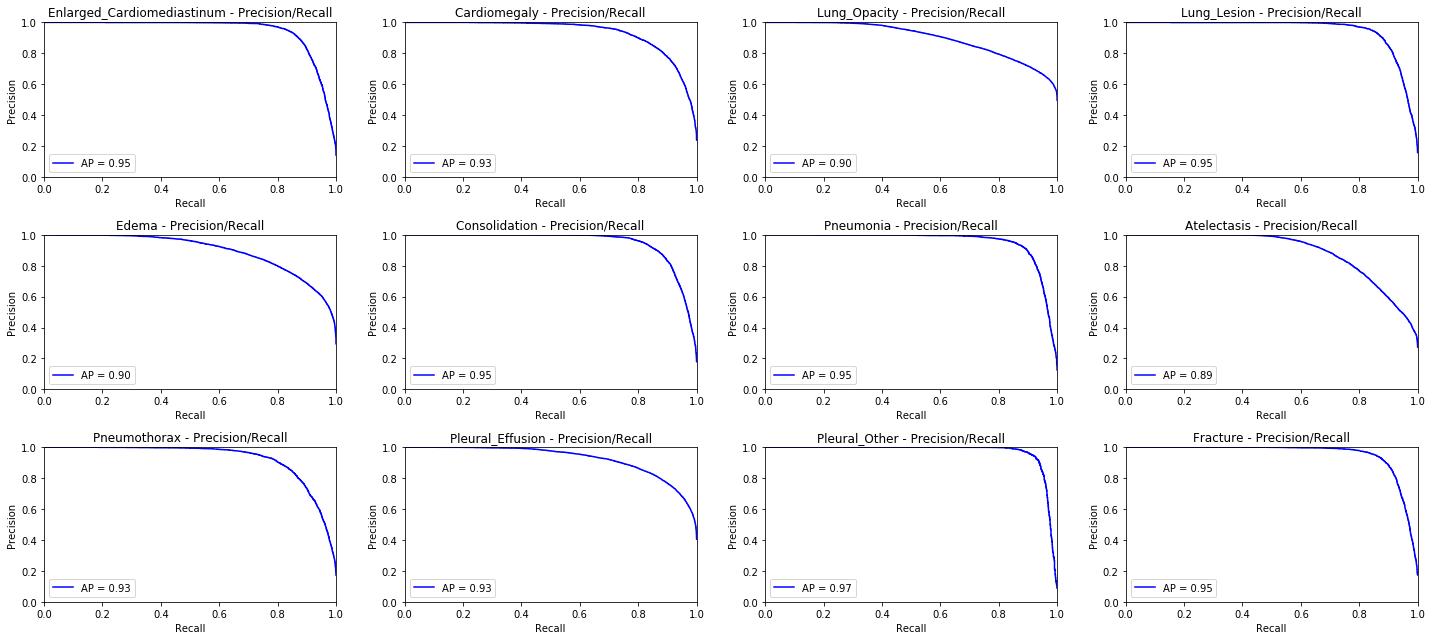


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.073999
Hamming Loss,0.193756
Hamming Accuracy,0.806244
Combined Recall,0.415355
Combined Precision,0.305286
Combined F1,0.326690


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,282,894,0.269504,0.085011,0.129252,0.563703,0.083289
1,Cardiomegaly,580,605,0.370690,0.355372,0.362869,0.766631,0.325836
2,Lung_Opacity,2266,2688,0.642101,0.541295,0.587404,0.623695,0.562412
3,Lung_Lesion,186,129,0.069892,0.100775,0.082540,0.629615,0.063915
4,Edema,1146,1298,0.508726,0.449153,0.477087,0.756542,0.458977
5,Consolidation,297,869,0.269360,0.092060,0.137221,0.602442,0.086084
6,Pneumonia,110,99,0.036364,0.040404,0.038278,0.574177,0.032128
7,Atelectasis,772,924,0.248705,0.207792,0.226415,0.575308,0.195365
8,Pneumothorax,390,849,0.376923,0.173145,0.237288,0.693536,0.185865
9,Pleural_Effusion,1704,2910,0.822770,0.481787,0.607716,0.756839,0.618659


***** ROC *****


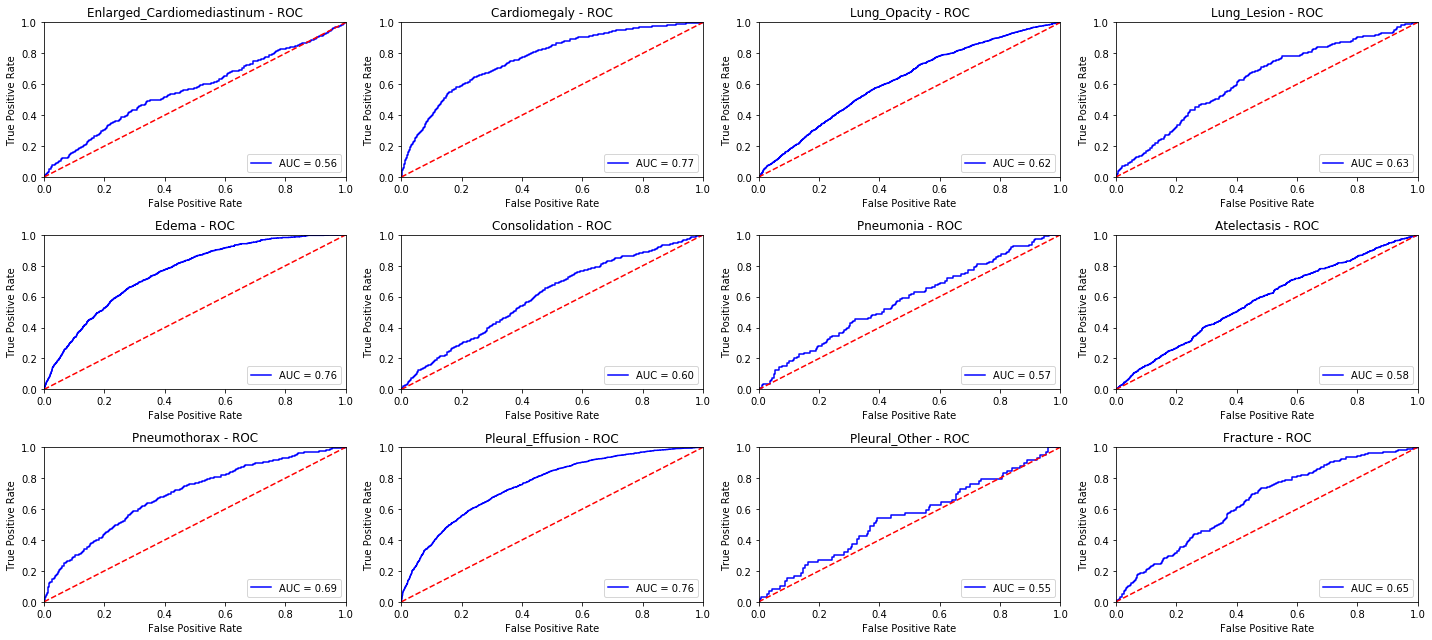

***** Precision / Recall *****


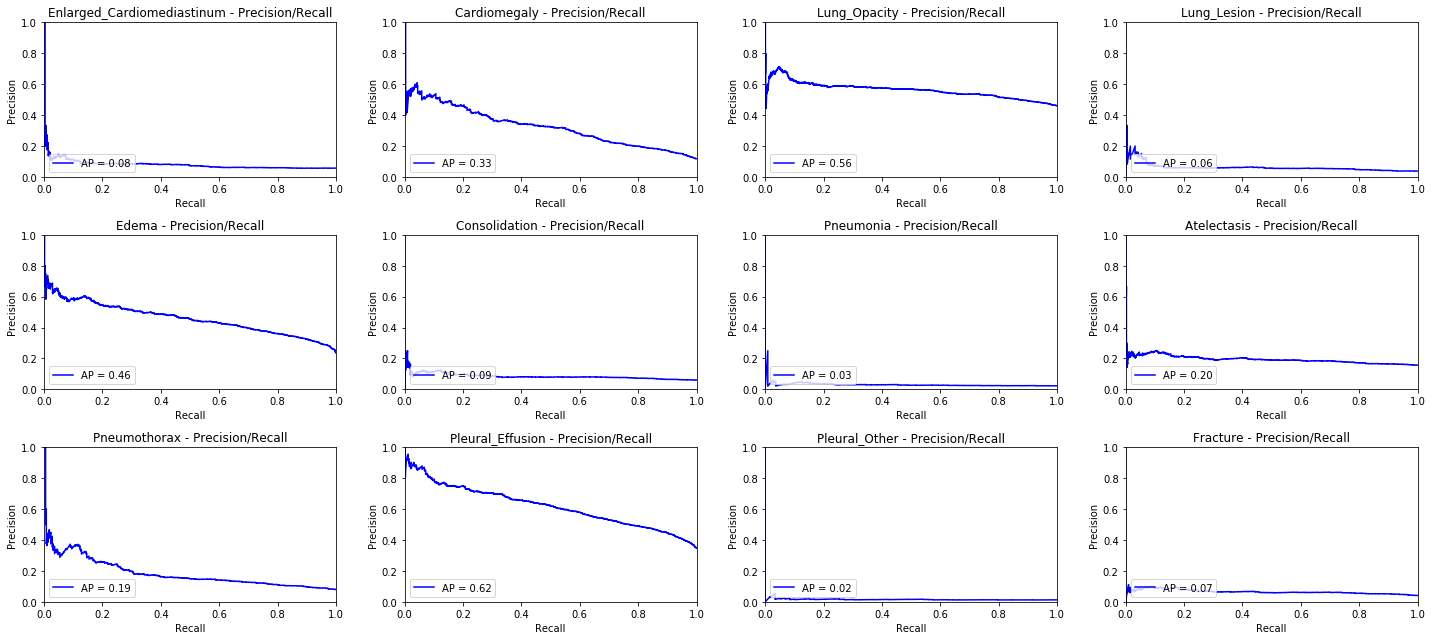

In [8]:
standardTraining.displayMetrics()


ACCURACY

▔▔▔▔


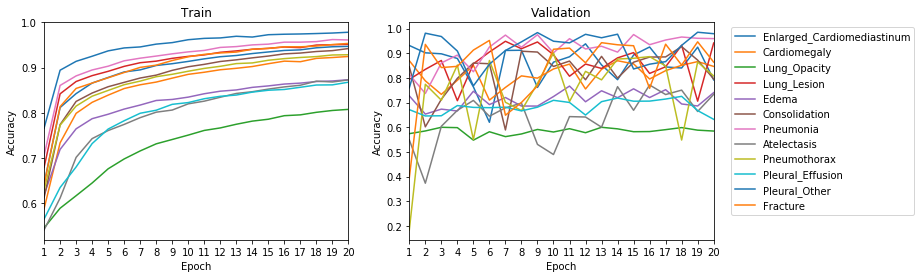


RECALL

▔▔▔


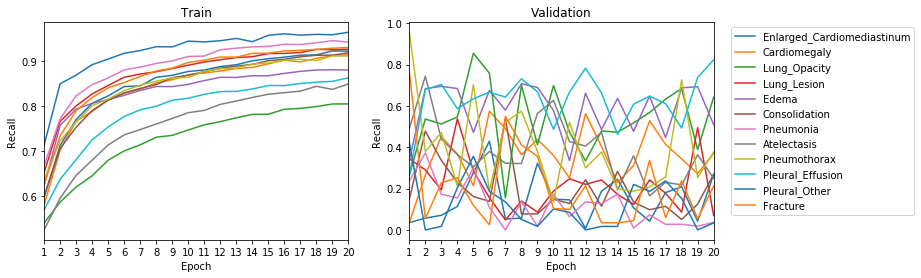


PRECISION

▔▔▔▔▔▔


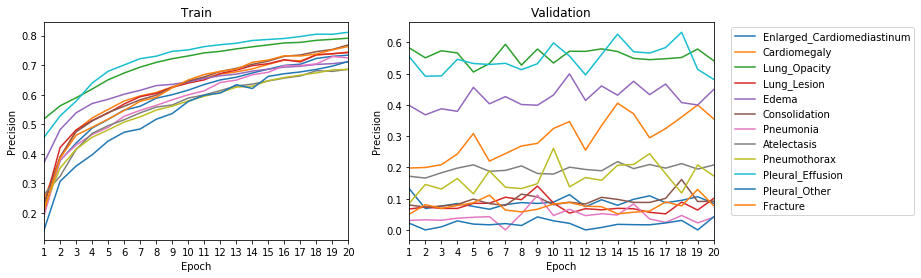


F1

▔


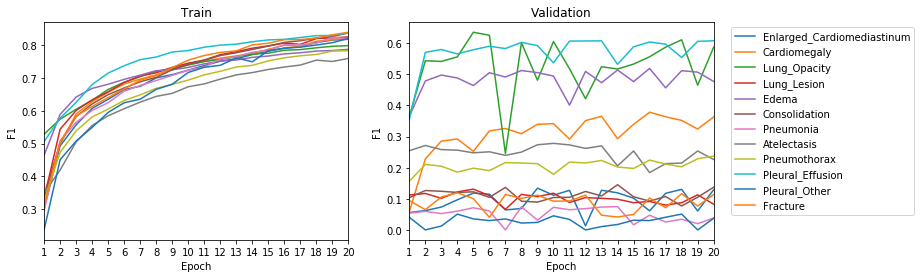


ROC AUC

▔▔▔▔


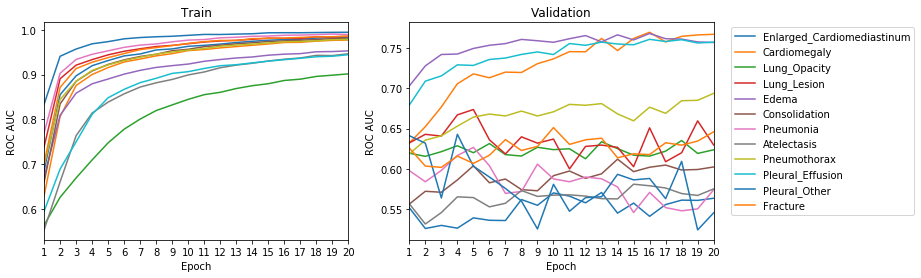


AVERAGE PRECISION

▔▔▔▔▔▔▔▔


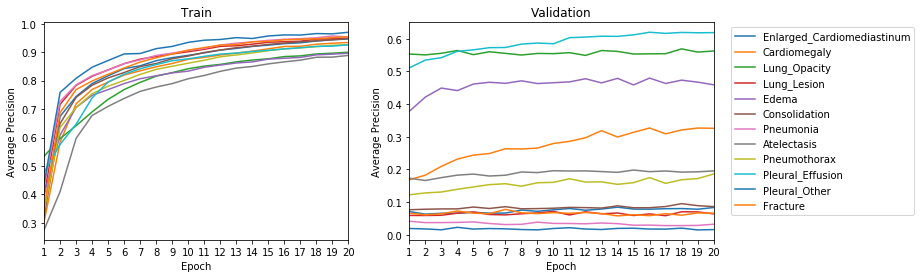

In [9]:
standardTraining.displayEpochProgression()

In [10]:
standardTraining.save()